<a href="https://colab.research.google.com/github/anmartsi/Bot_Enfermedades_Infantiles/blob/main/Proyecto_bot_enfermedades_infantiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto bot para el diagnóstico de enfermedades infantiles

Este proyecto de chatbot es un Trabajo de Fin de Máster por parte de la alumna Andrea Martínez Sirvent del máster de Procesamiento del Lenguaje Natural e Inteligencia Artificial de La Rioja bajo la supervisión de Matías Núñez. El chatbot se ha desarrollado en la plataforma RASA, que ofrece flexibilidad y una gran comunidad de soporte. Rasa se utiliza para desarrollar tanto el componente NLU (Natural Language Understanding) como el Core, aprovechando su capacidad para manejar diálogos complejos y personalizables.




**Propósito del proyecto**

En plena explosión del uso de inteligencia artificial, un chatbot que pueda proporcionar orientación preliminar sobre la salud infantil puede aliviar la carga en los sistemas de salud y ofrecer tranquilidad a los padres y cuidadores preocupados por la salud de sus hijos o niños a su cargo.

Mediante la introducción de síntomas observables en el input del chatbot, el chatbot otorga un posible diagnóstico de la enfermedad y los siguientes pasos a seguir.


**Contacto**

Para más información acerca del proyecto o interés en dar tu opinión, escribir a:



*   **Nombre:** Andrea Martínez Sirvent
*   **Correo:** andreamsir@gmail.com







## Sobre el bot

### ¿Qué puede hacer el bot?
El bot puede proporcionar un diagnóstico en base a los síntomas introducidos en el input cuando chateamos con él. Cuando comencemos a hablar con él, nos pregúntará cuáles son los síntomas que podemos observar. Podemos introducir cualquier síntoma que observemos (fiebre, tos, granitos, ronchas, malestar...) y, si está entre aquellos en la base de datos del chatbot, el sistema tomará nota de ello y lo usará para emitir el posible diagnóstico.

Por ejemplo, podemos introducir algo como: "Mi hijo tiene el cuerpo lleno de ronchas y fiebre alta". Al interpretar ronchas y fiebre alta como síntomas de la varicela, el bot nos responderá con: "Si tu hijo tiene una erupción de pequeñas costras que causan gran comezón por todo el cuerpo, lo más seguro es que se trate de varicela. No es necesario acudir al médico si los síntomas no empeoran. Existen a disposición tratamientos para aliviar el picor.".

### Enfermedades que conoce

Debido a que es un chatbot enfocado en enfermedades típicamente infantiles, los posibles diagnósticos con los que nos vamos a encontrar son:

*   Enfermedad mano-pie-boca
*   Gastroenteritis común
* Fiebre escarlatina
* Eritema infeccioso o enfermedad de la bofetada
* Tosferina
* Varicela
* Sarampión
* Paperas

### Limitaciones del chatbot

El chatbot interpreta los síntomas de manera muy literal. Es posible que se dé el caso de que estés introduciendo un síntoma o parte del cuerpo que el chatbot lo haya aprendido escrito de una manera distinta y, por tanto, no lo identifique como un elemento a tener en cuenta para el diagnóstico. Por ejemplo, si introducimos la frase "mi hijo tiene fiebre y manchas en los cachetes" es más que probable que el sistema ignore la presencia de "cachetes", ya que es una palabra que no conoce y proporcionará un diagnóstico en el que "fiebre" y "manchas" sean parte de los síntomas, como el sarampión.

Por el contrario, si, en lugar de usar cachetes, usamos "mejillas", una palabra que sí conoce, el bot debería proporcionar entonces el diagnóstico del eritema infeccioso o enfermedad de la bofetada.

Por otra parte, por un motivo que se desconoce, existe cierto sesgo especialmente hacia la enfermedad mano-pie-boca. Esto quiere decir que, si introduces síntomas que compartan varias enfermedades, como "fiebre" y "erupción", las probabilidades de que el chatbot proporcione el diagnóstico de la enfermedad mano-pie-boca son bastante altas.

## Instrucciones de uso

A lo largo de este cuaderno, tendremos que ir ejecutando cada celda (recuadro de color gris que contiene el código) haciendo click en [] en la esquina superior izquierda de cada una de ellas. Veremos un botón de play y aparecerá un símbolo ✓ una vez la celda haya terminado de ejecutarse. Una vez se haya ejecutado una celda, deberemos ejecutar la siguiente en el orden en el que aparecen.



A continuación, detallo los pasos para la instalación y uso del bot.


### Paso 1:

Ejecutamos la celda de abajo para cargar los archivos necesarios para el funcionamiento del bot mediante GitHub. Para comprobar que los archivos se han cargado correctamente, podemos clicar en el símbolo de la carpeta a nuestra izquierda y tendrá que aparecer una carpeta llamada "Bot_Enfermedades_Infantiles".

In [ ]:
!git clone https://github.com/anmartsi/Bot_Enfermedades_Infantiles.git

### Paso 2:

Como el bot está desarrollado en una plataforma llamada Rasa, tendremos que instalar esta plataforma para hacer funcionar el chatbot. Este proceso dura alrededor de unos 2 minutos. Tras ejecutarse, nos aparecerá un mensaje que pedirá que reiniciemos sesión y aceptaremos.

In [ ]:
!pip install rasa

### Paso 3:

Ejecutamos la siguiente celda para importar los módulos que hacen que Rasa encuentre los archivos que previamente hemos descargado y para poder utilizar su interfaz.

In [ ]:
import os
import rasa

### Paso 4:

Ejecutamos las siguientes tres celdas en orden. De esta manera configuramos y preparamos los archivos para el entrenamiento del bot.

In [ ]:
project='Bot_Enfermedades_Infantiles'

In [ ]:
os.chdir(project)
print(os.listdir("."))

In [ ]:
config = "config.yml"
training_files = "data/"
domain = 'domain.yml'
output = 'models/'

### Paso 5:
Uno de los pasos más importantes: el entrenamiento. Para que el bot funcione correctamente, primero hay que entrenarlo. Hay que entrenar el bot cada vez que se realice un cambio en el código y el modelo entrenado se guardará automáticamente en la carpeta "models". El bot usará siempre el último modelo entrenado.

El proceso suele durar alrededor de unos 3 minutos y veremos que ha terminado de entrenar cuando veamos un mensaje en verde que pone "Your Rasa model is trained and saved at 'models/(nombre del modelo)'".

In [ ]:
model_path = rasa.train(domain, config, [training_files], output)
print(model_path)

### Paso 6:

Ahora ya podemos hacer funcionar el chatbot.

Ejecutamos la celda siguiente para lanzar el servidor y poder chatear con el bot. En este caso, la celda no dejará de ejecutarse hasta que no interrumpamos el proceso nosotros. Se empezará a cargar la interfaz del chat y tras más o menos 1 minuto aparecerá un mensaje en verde que dice "Bot loaded. Type a message and press enter (use '/stop' to exit):" . Tras este mensaje podremos clicar en la celda del input y empezar a chatear (si no aparece la celda, ver el punto 2 del "A tener en cuenta:" más abajo).

Para empezar una conversación con el chatbot es necesario saludarlo primero. Con un simple "hola" basta. Una vez el chatbot devuelva el saludo, se puede empezar con la descripción de los síntomas. Los síntomas necesitan estar escritos en el mismo mensaje, para que, basándose en los síntomas mencionados, el bot pueda llegar a una conclusión.

Una vez activado el bot, se puede escribir cuantas veces se quiera, sin que los mensajes anteriores afecten a los nuevos diagnósticos.

Cuando queramos terminar de hablar con el bot, podemos volver a clicar en el botón de la celda desde donde la hemos ejecutado y terminará el proceso.

**A TENER EN CUENTA:**


1.   En el entorno de Colab, Colab muestra el input del chatbot de manera encriptada, pero funciona correctamente a pesar de ello.
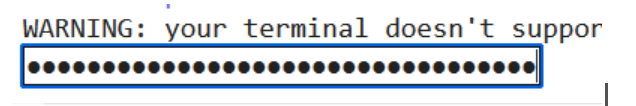

2.   Debido a problemas de compatibilidad con la interfaz, es posible que el contorno de la celda donde escribiremos el input (nuestros mensajes para el bot) desaparezca. Simplemente clicamos donde debería estar y aparecerá de nuevo lista para escribir otra vez.

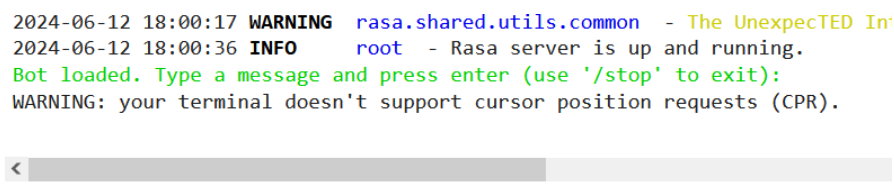
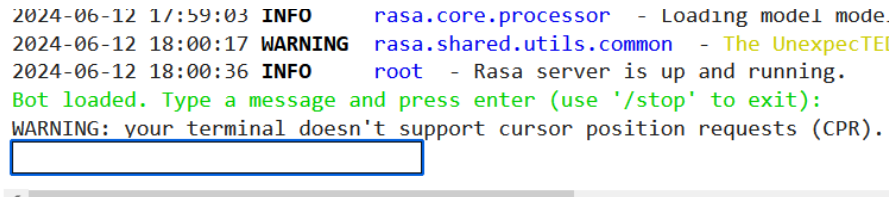

3. Cuando el bot nos da un diagnóstico aparecerá doble. Los mensajes del bot que tenemos que tener en cuenta son aquellos que aparecen escritos en azul.

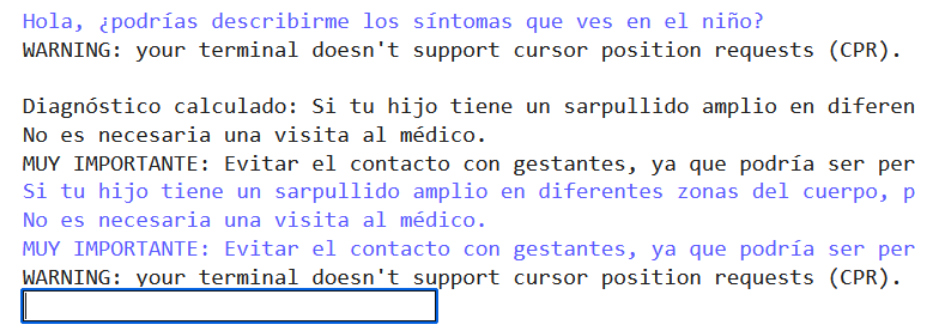



In [ ]:
# Establecimiento del servidor de RASA
endpoints = "endpoints.yml"

# Lanzamiento de las acciones personalizadas y de la interfaz del chatbot
!rasa run actions & rasa shell